# Import All Python Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
import time
import seaborn as sns 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.feature_selection import f_classif, SelectKBest, VarianceThreshold
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

# Loading the Datasets

In [2]:
df = pd.read_csv('IoT Network Intrusion Dataset.csv')
total_instances = df.shape[0]

# Print the result
print("Total Instances:", total_instances)

Total Instances: 625783


# Some Basic Cleaning and EDA

In [3]:
# There are some infinite values in this column, which prevent saling. So, replacing them by max value of float64
Max_Val_Float_64 = np.finfo(np.float64).max
df['Flow_Byts/s'] = df['Flow_Byts/s'].replace([np.inf, -np.inf], Max_Val_Float_64)
df['Flow_Pkts/s'] = df['Flow_Pkts/s'].replace([np.inf, -np.inf], Max_Val_Float_64)

# Replace Missing Value

In [4]:
# Replace missing values with the mode for each column
df.fillna(df.mode().iloc[0], inplace=True)


In [5]:
df

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,192.168.0.24-210.89.164.90-56112-8043-17,192.168.0.24,56112,210.89.164.90,8043,17,25/07/2019 03:25:00 AM,277,1,1,...,0.0,0.0,0.0,277.0,0.000000,277.0,277.0,Anomaly,Mirai,Mirai-UDP Flooding
625779,192.168.0.13-222.131.171.244-554-4570-6,222.131.171.244,4570,192.168.0.13,554,6,26/05/2019 10:06:51 PM,1658,0,2,...,0.0,0.0,0.0,1658.0,0.000000,1658.0,1658.0,Anomaly,DoS,DoS-Synflooding
625780,192.168.0.13-192.168.0.16-9020-52739-6,192.168.0.16,52739,192.168.0.13,9020,6,11/07/2019 01:29:09 AM,77,1,1,...,0.0,0.0,0.0,77.0,0.000000,77.0,77.0,Anomaly,Scan,Scan Port OS
625781,192.168.0.13-192.168.0.16-9020-49784-6,192.168.0.13,9020,192.168.0.16,49784,6,20/05/2019 05:00:29 AM,240,2,1,...,0.0,0.0,0.0,120.0,7.071068,125.0,115.0,Normal,Normal,Normal


# Data Encoding and Data Normalization

In [6]:
Categorical_Columns = df.select_dtypes(include=['object']).columns
Numerical_Columns = df.select_dtypes(include=['int64','float64']).columns

print("Categorical Columns: ", Categorical_Columns)
print("Numerical Columns: ", Numerical_Columns)

Categorical Columns:  Index(['Flow_ID', 'Src_IP', 'Dst_IP', 'Timestamp', 'Label', 'Cat', 'Sub_Cat'], dtype='object')
Numerical Columns:  Index(['Src_Port', 'Dst_Port', 'Protocol', 'Flow_Duration', 'Tot_Fwd_Pkts',
       'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max',
       'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std',
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean',
       'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags',
       'Bwd_URG_Flags', 'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s',
       'Bwd_Pkts/s', 'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean',
       'Pkt_Len_Std', 'Pkt_Len_Var', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt',
       'RST_Fla

# Counting Labels 

In [7]:
# Count the number of samples for each class in the 'Label' column
label_counts = df['Label'].value_counts()

label_counts

Label
Anomaly    585710
Normal      40073
Name: count, dtype: int64

In [8]:
# Count the number of samples for each class in the 'Label' column
cat_counts = df['Cat'].value_counts()

cat_counts

Cat
Mirai                415677
Scan                  75265
DoS                   59391
Normal                40073
MITM ARP Spoofing     35377
Name: count, dtype: int64

In [9]:
# Count the number of samples for each sub-category in the 'Sub_Cat' column
sub_cat_counts = df['Sub_Cat'].value_counts()

sub_cat_counts

Sub_Cat
Mirai-UDP Flooding       183554
Mirai-Hostbruteforceg    121181
DoS-Synflooding           59391
Mirai-HTTP Flooding       55818
Mirai-Ackflooding         55124
Scan Port OS              53073
Normal                    40073
MITM ARP Spoofing         35377
Scan Hostport             22192
Name: count, dtype: int64

# Data Scaling and Encoding

In [10]:
# Assuming df is your DataFrame and Numerical_Columns contains the columns you want to scale
for col in Numerical_Columns:
    Scaler = MaxAbsScaler()
    df[col] = Scaler.fit_transform(df[col].astype(str).astype('float64').values.reshape(-1, 1))

for col in Categorical_Columns:
    if col != 'Label':
        LE = LabelEncoder()
        df[col] = LE.fit_transform(df[col].values.reshape(-1,1))
df

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,12446,25883,0.152672,203,0.154518,1.000000,3496,0.000750,0.005376,0.001786,...,0.0,0.0,0.0,0.000750,0.000000,0.000750,0.000750,Anomaly,2,2
1,22760,34617,0.033267,200,0.008475,0.352941,3664,0.053108,0.005376,0.003571,...,0.0,0.0,0.0,0.026557,0.033715,0.042551,0.010563,Anomaly,0,0
2,12691,25886,0.804992,200,0.137982,0.352941,2082,0.001410,0.000000,0.005357,...,0.0,0.0,0.0,0.000705,0.000011,0.000710,0.000700,Anomaly,4,8
3,12704,25886,0.808611,200,0.137982,0.352941,791,0.001510,0.000000,0.003571,...,0.0,0.0,0.0,0.001510,0.000000,0.001510,0.001510,Anomaly,2,4
4,611,25881,0.561267,317,0.029065,1.000000,1040,0.001530,0.010753,0.001786,...,0.0,0.0,0.0,0.000765,0.000011,0.000770,0.000760,Anomaly,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,62081,25889,0.856672,233,0.123036,1.000000,3443,0.002770,0.005376,0.001786,...,0.0,0.0,0.0,0.002771,0.000000,0.002771,0.002771,Anomaly,2,5
625779,18760,30623,0.069771,200,0.008475,0.352941,3637,0.016583,0.000000,0.003571,...,0.0,0.0,0.0,0.016584,0.000000,0.016584,0.016584,Anomaly,0,0
625780,12695,25886,0.805176,200,0.137982,0.352941,2285,0.000770,0.005376,0.001786,...,0.0,0.0,0.0,0.000770,0.000000,0.000770,0.000770,Anomaly,4,8
625781,12682,25883,0.137710,203,0.761561,0.352941,2872,0.002400,0.010753,0.001786,...,0.0,0.0,0.0,0.001200,0.000105,0.001250,0.001150,Normal,3,6


# Transform the Labels

In [11]:
str2idx_Label = {label:idx for idx, label in enumerate(df.Label.unique())}
str2idx_Label

{'Anomaly': 0, 'Normal': 1}

In [12]:
df.Label = df.Label.map(str2idx_Label)

In [14]:
# Count the number of samples for each class in the 'Label' column
label_counts = df['Label'].value_counts()

label_counts

Label
0    585710
1     40073
Name: count, dtype: int64

In [15]:
# Count the number of samples for each class in the 'Label' column
cat_counts = df['Cat'].value_counts()

cat_counts

Cat
2    415677
4     75265
0     59391
3     40073
1     35377
Name: count, dtype: int64

In [16]:
# Count the number of samples for each sub-category in the 'Sub_Cat' column
sub_cat_counts = df['Sub_Cat'].value_counts()

sub_cat_counts

Sub_Cat
5    183554
4    121181
0     59391
3     55818
2     55124
8     53073
6     40073
1     35377
7     22192
Name: count, dtype: int64

# Data Splitting 

In [17]:
x = df.drop('Label',axis=1)
y = df.Label

In [18]:
# Separate features (x) and labels (y)
x = df.drop('Label', axis=1)
y = df['Label']

# Concatenate x and y to create a new DataFrame
df1 = pd.concat([x, y], axis=1)

# Print the new DataFrame
print("New DataFrame:")
print(df1)

New DataFrame:
        Flow_ID  Src_IP  Src_Port  Dst_IP  Dst_Port  Protocol  Timestamp  \
0         12446   25883  0.152672     203  0.154518  1.000000       3496   
1         22760   34617  0.033267     200  0.008475  0.352941       3664   
2         12691   25886  0.804992     200  0.137982  0.352941       2082   
3         12704   25886  0.808611     200  0.137982  0.352941        791   
4           611   25881  0.561267     317  0.029065  1.000000       1040   
...         ...     ...       ...     ...       ...       ...        ...   
625778    62081   25889  0.856672     233  0.123036  1.000000       3443   
625779    18760   30623  0.069771     200  0.008475  0.352941       3637   
625780    12695   25886  0.805176     200  0.137982  0.352941       2285   
625781    12682   25883  0.137710     203  0.761561  0.352941       2872   
625782    12446   25883  0.152672     203  0.154518  1.000000       3453   

        Flow_Duration  Tot_Fwd_Pkts  Tot_Bwd_Pkts  ...  Active_Std  \
0 

In [19]:
df1

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Cat,Sub_Cat,Label
0,12446,25883,0.152672,203,0.154518,1.000000,3496,0.000750,0.005376,0.001786,...,0.0,0.0,0.0,0.000750,0.000000,0.000750,0.000750,2,2,0
1,22760,34617,0.033267,200,0.008475,0.352941,3664,0.053108,0.005376,0.003571,...,0.0,0.0,0.0,0.026557,0.033715,0.042551,0.010563,0,0,0
2,12691,25886,0.804992,200,0.137982,0.352941,2082,0.001410,0.000000,0.005357,...,0.0,0.0,0.0,0.000705,0.000011,0.000710,0.000700,4,8,0
3,12704,25886,0.808611,200,0.137982,0.352941,791,0.001510,0.000000,0.003571,...,0.0,0.0,0.0,0.001510,0.000000,0.001510,0.001510,2,4,0
4,611,25881,0.561267,317,0.029065,1.000000,1040,0.001530,0.010753,0.001786,...,0.0,0.0,0.0,0.000765,0.000011,0.000770,0.000760,2,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625778,62081,25889,0.856672,233,0.123036,1.000000,3443,0.002770,0.005376,0.001786,...,0.0,0.0,0.0,0.002771,0.000000,0.002771,0.002771,2,5,0
625779,18760,30623,0.069771,200,0.008475,0.352941,3637,0.016583,0.000000,0.003571,...,0.0,0.0,0.0,0.016584,0.000000,0.016584,0.016584,0,0,0
625780,12695,25886,0.805176,200,0.137982,0.352941,2285,0.000770,0.005376,0.001786,...,0.0,0.0,0.0,0.000770,0.000000,0.000770,0.000770,4,8,0
625781,12682,25883,0.137710,203,0.761561,0.352941,2872,0.002400,0.010753,0.001786,...,0.0,0.0,0.0,0.001200,0.000105,0.001250,0.001150,3,6,1


# Technique for Balancing Datasets

In [20]:
# Create a RandomOverSampler object
random_sampler = RandomOverSampler(random_state=42)

# Resample the data using random oversampling
x_resampled, y_resampled = random_sampler.fit_resample(x, y)

# Create a Pandas Series from the resampled labels and print the counts
print("Number of samples after applying random oversampling:")
print(pd.Series(y_resampled).value_counts())

Number of samples after applying random oversampling:
Label
0    585710
1    585710
Name: count, dtype: int64


In [21]:
# Assuming you have already imported and initialized x and y

# Create a RandomOverSampler object
random_sampler = RandomOverSampler(random_state=42)

# Resample the data using random oversampling
x_resampled, y_resampled = random_sampler.fit_resample(x, y)

# Split the resampled data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Print the counts of classes in the training set
print("Number of samples in the training set:")
print(pd.Series(y_train).value_counts())

# Print the counts of classes in the testing set
print("\nNumber of samples in the testing set:")
print(pd.Series(y_test).value_counts())

Number of samples in the training set:
Label
1    468568
0    468568
Name: count, dtype: int64

Number of samples in the testing set:
Label
1    117142
0    117142
Name: count, dtype: int64


In [22]:
'''# Assuming you have y_train and y_test
# Print the counts of classes in the training set separately for 0 and 1
print("Number of samples in the training set:")
print(pd.Series(y_train).value_counts())

# Print the counts of classes in the testing set separately for 0 and 1
print("\nNumber of samples in the testing set:")
print(pd.Series(y_test).value_counts())'''

# Combine 0 and 1 class label counts separately for training and testing sets
train_class_counts = pd.Series(y_train).value_counts()
test_class_counts = pd.Series(y_test).value_counts() 

# Print the combined counts for both classes in the training set
print("\nCombined counts for classes 0 and 1 in the training set:")
print(train_class_counts) 

# Print the combined counts for both classes in the testing set
print("\nCombined counts for classes 0 and 1 in the testing set:")
print(test_class_counts)

# Calculate and print the total counts for both classes
total_train_samples = train_class_counts.sum()
total_test_samples = test_class_counts.sum()

print("\nTotal count for both classes in the training set:", total_train_samples)
print("Total count for both classes in the testing set:", total_test_samples)


Combined counts for classes 0 and 1 in the training set:
Label
1    468568
0    468568
Name: count, dtype: int64

Combined counts for classes 0 and 1 in the testing set:
Label
1    117142
0    117142
Name: count, dtype: int64

Total count for both classes in the training set: 937136
Total count for both classes in the testing set: 234284


# Reducting Dimension's of feature Dataset

In [24]:
from sklearn.decomposition import PCA

# Create a PCA instance
pca = PCA(n_components= 2 )

# Fit the PCA on the training data and transform both the training and testing data
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Now, x_train_pca and x_test_pca contain the transformed features after PCA

# Optionally, you can print the explained variance ratio to understand the amount of information retained
print("Explained Variance Ratio after PCA:")
print(pca.explained_variance_ratio_)

# You can also choose the number of components based on the explained variance
# For example, to retain 95% of the variance:
# pca = PCA(n_components=0.95)
# x_train_pca = pca.fit_transform(x_train)
#x_test_pca = pca.transform(x_test)

Explained Variance Ratio after PCA:
[0.86090074 0.13772884]


# Model Training and Evaluation

Training Time: 80.47292017936707 seconds
Testing Time: 1.1133091449737549 seconds
Accuracy: 0.9999786583804272

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    117142
           1       1.00      1.00      1.00    117142

    accuracy                           1.00    234284
   macro avg       1.00      1.00      1.00    234284
weighted avg       1.00      1.00      1.00    234284



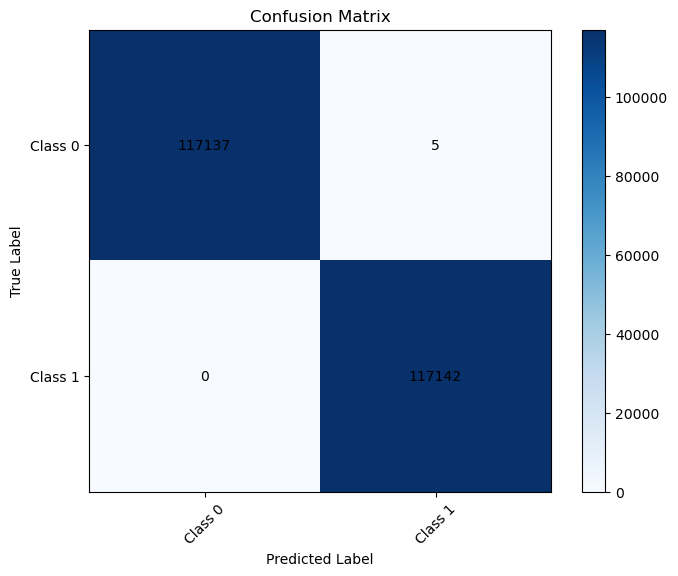

False Positive Rate (FPR): 4.268323914565229e-05
ROC AUC: 0.9999999998542514


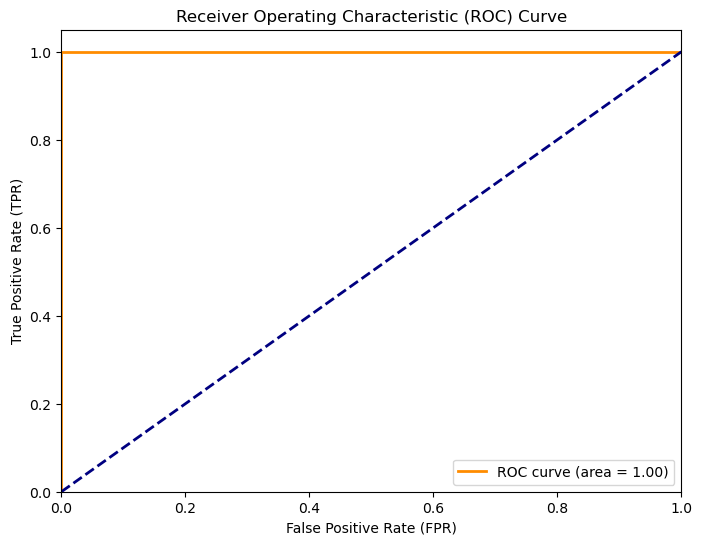

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
import time

# Assuming x and y are original features and labels
# ... (your SMOTE and PCA code)

# Create a Random Forest Classifier instance
rf_classifier = RandomForestClassifier(random_state=42)

# Measure training time
start_time = time.time()
rf_classifier.fit(x_train_pca, y_train)
training_time = time.time() - start_time
print("Training Time:", training_time, "seconds")

# Measure testing time
start_time = time.time()
y_pred = rf_classifier.predict(x_test_pca)
testing_time = time.time() - start_time
print("Testing Time:", testing_time, "seconds")

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix with class numbers
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ["Class 0", "Class 1"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Print class numbers inside the plot
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', verticalalignment='center', color='black')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

# Calculate False Positive Rate (FPR)
fpr = conf_matrix[0, 1] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print("False Positive Rate (FPR):", fpr)

# Get the predicted probabilities for the positive class (Class 1)
y_prob = rf_classifier.predict_proba(x_test_pca)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC:", roc_auc)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Training Time: 0.6714069843292236 seconds
Testing Time: 0.0019080638885498047 seconds
Accuracy: 0.6555249184750133

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.37      0.52    117142
           1       0.60      0.94      0.73    117142

    accuracy                           0.66    234284
   macro avg       0.73      0.66      0.63    234284
weighted avg       0.73      0.66      0.63    234284



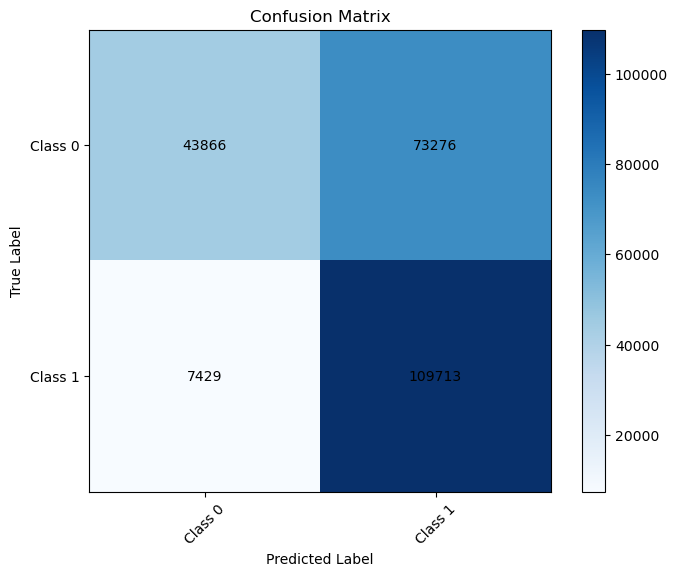

False Positive Rate (FPR): 0.6255314063273634
ROC AUC: 0.7447688907719713


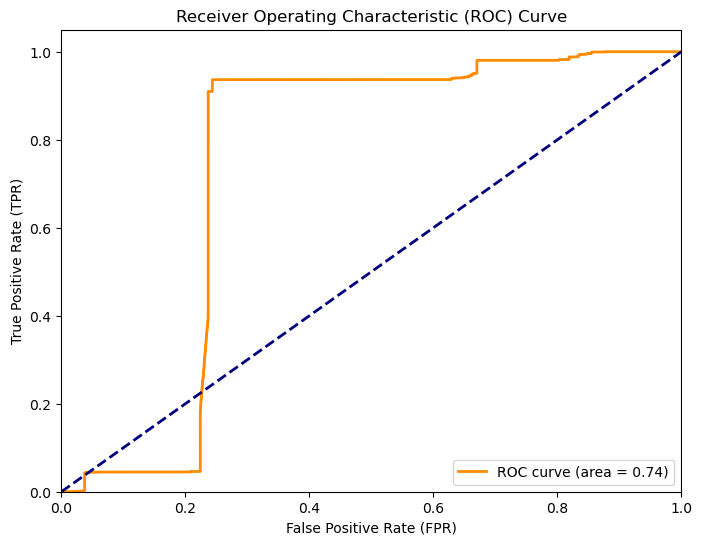

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
import time

# Create a Logistic Regression instance
logreg_classifier = LogisticRegression(random_state=42)

# Measure training time
start_time = time.time()
logreg_classifier.fit(x_train_pca, y_train)
training_time = time.time() - start_time
print("Training Time:", training_time, "seconds")

# Measure testing time
start_time = time.time()
y_pred = logreg_classifier.predict(x_test_pca)
testing_time = time.time() - start_time
print("Testing Time:", testing_time, "seconds")

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix with class numbers
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ["Class 0", "Class 1"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', verticalalignment='center', color='black')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

# Calculate False Positive Rate (FPR)
fpr = conf_matrix[0, 1] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print("False Positive Rate (FPR):", fpr)

# Get the predicted probabilities for the positive class (Class 1)
y_prob = logreg_classifier.predict_proba(x_test_pca)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC:", roc_auc)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Training Time: 23.82824969291687 seconds
Testing Time: 0.6911158561706543 seconds
Accuracy: 0.9775315429137287

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    117142
           1       0.99      0.96      0.98    117142

    accuracy                           0.98    234284
   macro avg       0.98      0.98      0.98    234284
weighted avg       0.98      0.98      0.98    234284



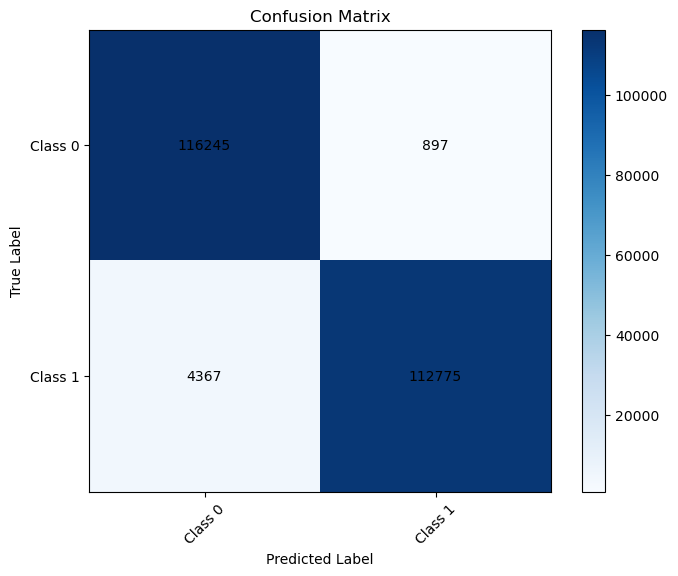

False Positive Rate (FPR): 0.00765737310273002
ROC AUC: 0.998033297009538


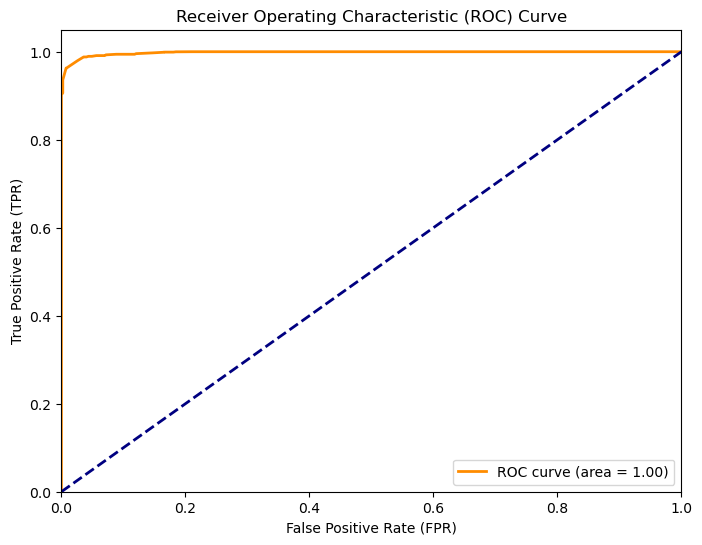

In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
import time

# Assuming x and y are original features and labels
# ... (your SMOTE and PCA code)

# Create an AdaBoost Classifier instance
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Measure training time
start_time = time.time()
adaboost_classifier.fit(x_train_pca, y_train)
training_time = time.time() - start_time
print("Training Time:", training_time, "seconds")

# Measure testing time
start_time = time.time()
y_pred = adaboost_classifier.predict(x_test_pca)
testing_time = time.time() - start_time
print("Testing Time:", testing_time, "seconds")

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report for more detailed metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix with class numbers
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ["Class 0", "Class 1"]
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', verticalalignment='center', color='black')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

# Calculate False Positive Rate (FPR)
fpr = conf_matrix[0, 1] / (conf_matrix[0, 0] + conf_matrix[0, 1])
print("False Positive Rate (FPR):", fpr)

# Get the predicted probabilities for the positive class (Class 1)
y_prob = adaboost_classifier.predict_proba(x_test_pca)[:, 1]

# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC:", roc_auc)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
